loading package and set colors

In [1]:
library(ggplot2)
library(RColorBrewer)
library(dplyr)
library(tibble)
library(patchwork)
library(Seurat)
library(SeuratData)
library(magrittr)
library(scuttle)
library(circlize)
library(tidyr)
library(ComplexHeatmap)
library(magick)
library(svglite)


Attachement du package : ‘dplyr’


Les objets suivants sont masqués depuis ‘package:stats’:

    filter, lag


Les objets suivants sont masqués depuis ‘package:base’:

    intersect, setdiff, setequal, union


Attaching SeuratObject

Warning message in if (is.na(desc)) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”
Warning message in if (is.na(desc)) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”
Warning message in if (is.na(desc)) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”
Warning message in if (is.na(desc)) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”
Warning message in if (is.na(desc)) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”
Warning message in if (is.na(desc)) {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”
Warning message in if (is.na(desc)) {:
“la condition a une longueur > 1 et seul le premier él

In [2]:
custom_colors <- list()

colors_dutch <- c("#16a085", "#2980b9", "#4834d4", "#f39c12", "#c0392b",
                  "#130f40", "#f78fb3", "#65d6ce", "#d1c145", "#2ecc71",
                  "#d35400", "#c44569", '#ff7f50', '#706fd3', '#f9ca24',
                  '#34ace0', '#33d9b2', '#2c2c54', '#be2edd')

colors_spanish <- c(
  '#40407a','#706fd3','#f7f1e3','#34ace0','#33d9b2',
  '#2c2c54','#474787','#aaa69d','#227093','#218c74',
  '#ff5252','#ff793f','#d1ccc0','#ffb142','#ffda79',
  '#b33939','#cd6133','#84817a','#cc8e35','#ccae62'
)

custom_colors$discrete <- c(colors_dutch, colors_spanish)

custom_colors$cell_cycle <- setNames(
  c('#45aaf2', '#f1c40f', '#e74c3c', '#7f8c8d'),
  c('G1',      'S',       'G2M',     '-')
)

In [3]:
options(repr.plot.width = 18, repr.plot.height = 17, repr.plot.pointsize = 24)

chargement des données

In [4]:
microglia <- readRDS("/home/adufour/work/rds_storage/microglia/microglia.rds")

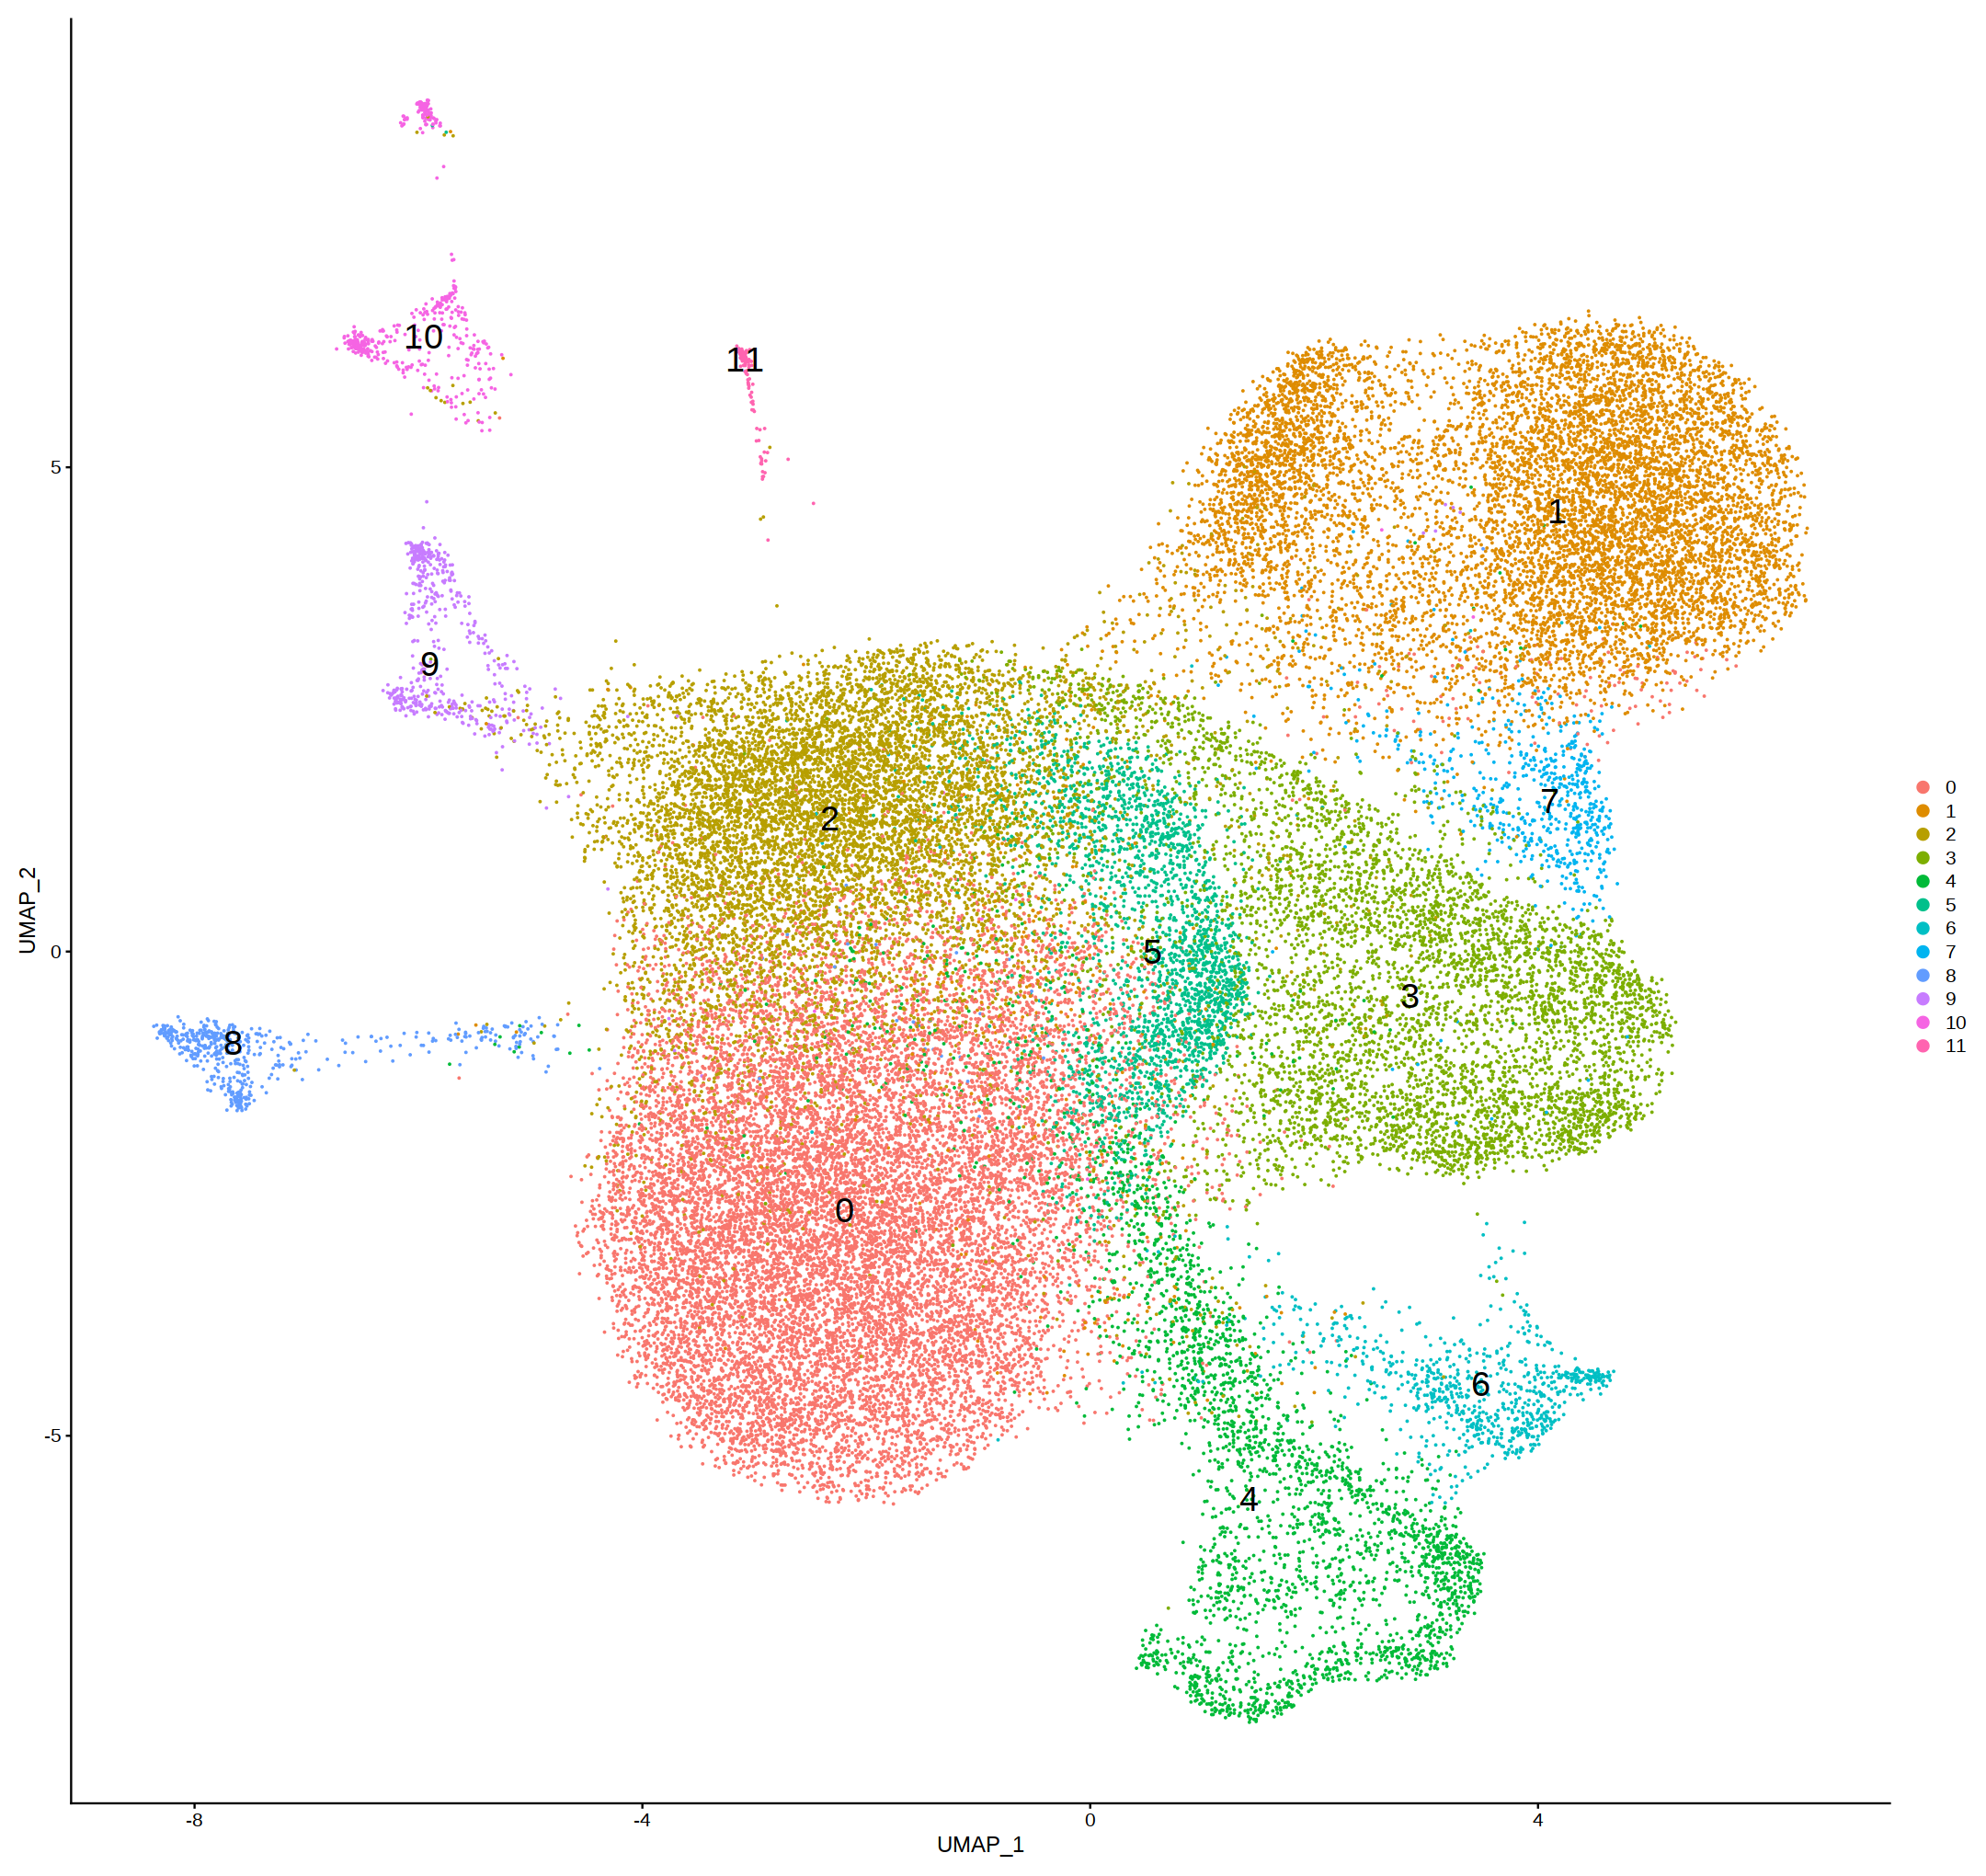

In [6]:
DimPlot(microglia, reduction = "umap", label = TRUE, label.size = 8)

In [8]:
Idents(microglia) <- "seurat_clusters"

In [9]:
microglia_pbs <- subset(x = microglia, subset = STIM == "pbs")

In [10]:
microglia_pbs_filter <- subset(x = microglia, idents = c("0", "1", "2", "3", "4", "5", "6", "7"))

In [11]:
microglia_pbs_filter@meta.data$seurat_clusters <- Idents(microglia_pbs_filter)

In [12]:
microglia_pbs_filter.markers <- FindAllMarkers(microglia_pbs_filter, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7



In [24]:
microglia_pbs_filter.markers_slice_20 <- microglia_pbs_filter.markers %>%
    group_by(cluster) %>%
    slice_max(n = 20, order_by = avg_log2FC)

In [25]:
microglia_counts <- GetAssayData(microglia, assay="RNA", slot="data")
average_expression_profiles_by_cluster <- as.matrix(microglia_counts[rownames(microglia_counts) %in% unique(microglia_pbs_filter.markers_slice_20$gene), ])

In [26]:
groups.use <- microglia_pbs_filter[['seurat_clusters']][, , drop = FALSE]

In [27]:
groups.use$cells <- rownames(groups.use)

In [28]:
groups.use <- groups.use[order(groups.use$seurat_clusters),]
cell_order <- groups.use$cells

In [35]:
mat <- MinMax(as.matrix(average_expression_profiles_by_cluster[,cell_order]), -2.5, 2.5)
col_fun <- colorRamp2(seq(min(mat), max(mat), length = 100), colorRampPalette(rev(brewer.pal(n = 10, name = "RdYlBu")))(100))
hb <- HeatmapAnnotation(foo = anno_block(gp = gpar(fill = c("#00a085","#1a7fb6","#4a2ed0","#f79c30","#c13626","#131140","#fc8eb3",'#54d5cc')),
                                                   labels = c('0', '1', '2', '3', '4', '5', '6', '7'),
                                         labels_gp = gpar(col = c("black", "black", "white", "black", "white", "white", "black", "black"), fontsize = 18)))
lgd <- list(title = "Expression levels", legend_height = unit(6, "cm"), grid_width = unit(1, "cm"), labels_gp = gpar(fontsize = 20), title_gp = gpar(fontsize = 18), title_position = "leftcenter-rot")

In [30]:
split = c(rep(0, as.list(table(groups.use$seurat_clusters))$`0`),
            rep(1, as.list(table(groups.use$seurat_clusters))$`1`),
            rep(2, as.list(table(groups.use$seurat_clusters))$`2`),
            rep(3, as.list(table(groups.use$seurat_clusters))$`3`),
            rep(4, as.list(table(groups.use$seurat_clusters))$`4`),
            rep(5, as.list(table(groups.use$seurat_clusters))$`5`),
            rep(6, as.list(table(groups.use$seurat_clusters))$`6`),
            rep(7, as.list(table(groups.use$seurat_clusters))$`7`)
        )

In [37]:
options(repr.plot.width=50, repr.plot.height=50) # To set the figure size in Jupyter
png('/home/adufour/work/notebook/plots/Microglia/gene_heatmap_top20_matrice_data.png',width=19,height=40,units="in",res=300)
hm <- draw(ComplexHeatmap::Heatmap(mat,
                                   col = col_fun,
                                   cluster_columns = FALSE,
                                   #cluster_rows = FALSE,
                                   row_names_gp=grid::gpar(fontface = "italic", fontsize=24),
                                   show_column_names = FALSE,
                                   top_annotation = hb,
                                   column_split = split,
                                   column_title = NULL,
                                   heatmap_legend_param = lgd), padding = unit(c(2, 2, 2, 10), "mm"))
dev.off()

`use_raster` is automatically set to TRUE for a matrix with more than
2000 columns You can control `use_raster` argument by explicitly
setting TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.



png 
  2